# Mount with google drive


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import nesscessary library


In [65]:
# !pip install scipy
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

##1.  Logistic Regression

In [17]:
ROOT_PATH = "/content/gdrive/MyDrive/AIL/Data"

# Read comma separated data
data = np.loadtxt(os.path.join(ROOT_PATH, 'ex2data1.txt'), delimiter=',')

In [49]:
# data

### 1.1. Plot data

In [47]:
def plot_data(X):
  plt.scatter(X[X[:, 2]==0][:, 0], X[X[:, 2]==0][:, 1])
  plt.scatter(X[X[:, 2]==1][:, 0], X[X[:, 2]==1][:, 1])
  # add axes labels
  plt.xlabel('Exam 1 score')
  plt.ylabel('Exam 2 score')
  plt.legend(['Not admitted', 'Admitted'])

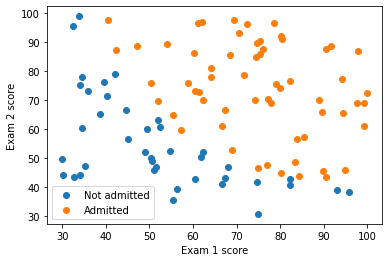

In [48]:
plot_data(data)

### 1.2. Implementation

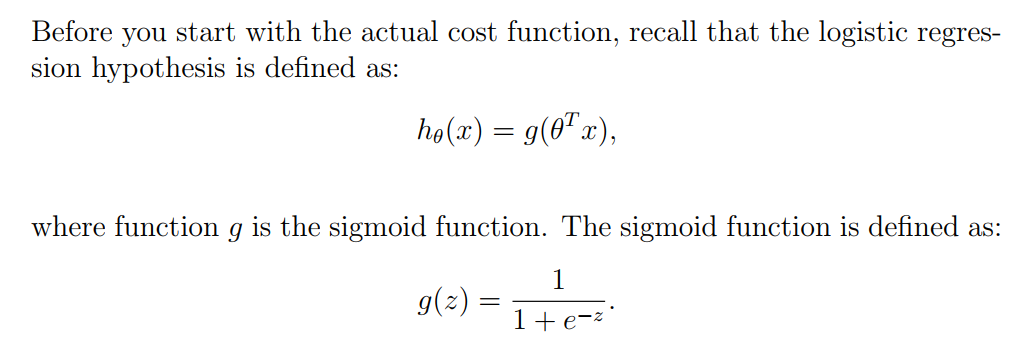

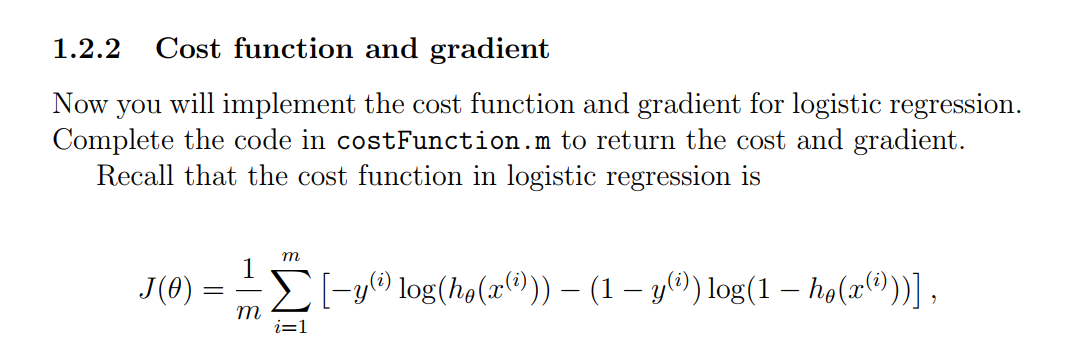

1.2.1. Warm up function

In [50]:
def sigmoid(z):
    # convert input to a numpy array
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))
    return g

In [52]:
z = 0
g = sigmoid(z)
g

0.5

1.2.2. Cost function and gradient


In [54]:
# Setup the data matrix appropriately, and add ones for the intercept term
X, y = data[:, 0:2], data[:, 2]
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [57]:
def costFunction(theta, X, y):
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

In [58]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


1.2.3 Learning parameters using scipy.optimize


In [70]:
# set options for optimize.minimize
options= {'maxiter': 400}

res = minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))


Cost at theta found by optimize.minimize: 0.203
Theta:
	[-25.161, 0.206, 0.201]


In [72]:
def mapFeature(X1, X2, degree=6):

    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [87]:
def plotData(X, y):
    # Create New Figure
    fig = plt.figure()

    # ====================== YOUR CODE HERE ======================
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'go', mfc='y', ms=8, mec='k', mew=1)
    
    # ============================================================

In [88]:
def plotDecisionBoundary(plot_data, theta, X, y):
    # make sure theta is a numpy array
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

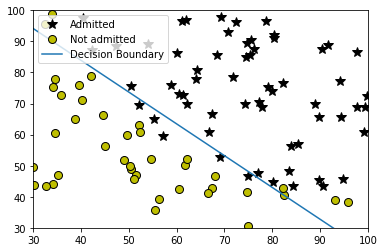

In [89]:
# Plot Boundary
plotDecisionBoundary(plotData, theta, X, y)

1.2.4. Evaluating logistic regression


In [101]:
def predict(theta, X):
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    
    return p

In [102]:
#  Predict probability for a student with score 45 on exam 1 and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
prob

0.7762906214285727

In [103]:
# Compute accuracy on our training set
p = predict(theta, X)
p

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])